You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.

Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

Use SQLAlchemy create_engine to connect to your sqlite database.

Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

# Step 3 - Climate Analysis and Exploration

Meriedith and Giselle's Girls' TRIP to Honolulu, HI

Dates: August 08, 2016 - August 12, 2016
Trip duration: 5 Days

In [1]:
# !rm hawaii.sqlite

In [2]:
import pandas as pd
import numpy as np

# Import SQL Alchemy; # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, inspect, func

# Import and establish Base for which classes will be constructed 
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# Import modules to declare columns and column data types
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, Date

import datetime as dt
from sqlalchemy import func

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [4]:
# Use SQLAlchemy create_engine to connect to your sqlite database.
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [8]:
# Assign the measurements class to a variable called `Measurements`
Measurement = Base.classes.measurements


In [9]:
# Assign the stations class to a variable called `Stations`
Station = Base.classes.stations


In [10]:
# Create a session
session = Session(engine)

In [11]:
###TESTING IF THE SECESSION WORKS FOR Measurements###
# Use the session to query Measurements table and display the first 5 dates
for row in session.query(Measurement, Measurement.date).limit(1).all():
    print(row)


(<sqlalchemy.ext.automap.measurements object at 0x10fa67748>, '2010-01-01')


In [12]:
###TESTING IF THE SECESSION WORKS FOR Stations###
# Use the session to query Stations table and display the first 5 dates
for row in session.query(Station, Station.name).limit(1).all():
    print(row)

(<sqlalchemy.ext.automap.stations object at 0x10fa67828>, 'WAIKIKI 717.2, HI US')


In [13]:
###TESTING THE SESSION PART 2###
#Query and print the number of unique Stations in Hawaii
# Hints: Look into counting and grouping operations in SQLAlchemy
### BEGIN SOLUTION
NumStations = session.query(Station).group_by(Station.station).count()
print(NumStations)
### END SOLUTION

9


In [14]:
# Use the session to query Dow table and display the first 5 trade volumes
for row in session.query(Station.station).limit(15).all():
    print(row)

('USC00511918',)
('USC00513117',)
('USC00514830',)
('USC00516128',)
('USC00517948',)
('USC00518838',)
('USC00519281',)
('USC00519397',)
('USC00519523',)


# Precipitation Analysis
Design a query to retrieve the last 12 months of precipitation data.

Select only the date and prcp values.

Load the query results into a Pandas DataFrame and set the index to the date column.

Plot the results using the DataFrame plot method.

Use Pandas to print the summary statistics for the precipitation data.

In [15]:
#Design a query to retrieve the last 12 months of precipitation data.
## To do this, query the Measurement table and order_by desc date

past_year = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
#print(past_year)

#this will dates in descending order

In [16]:
# Next, Select only the date and prcp values.

date_prcp = session.query(Measurement.date, Measurement.prcp, Measurement.station).order_by(Measurement.date.desc()).all()
#print(date_prcp)

# this prints our date and prcp in the order of descending dates

In [17]:
# Load the query results into a Pandas DataFrame
   #and set the index to the date column.

date_prcp_df = pd.DataFrame(date_prcp)
date_prcp_df.set_index("date").head()

,prcp,station
date,,
2017-08-23,0.00,USC00519397
2017-08-23,0.00,USC00514830
2017-08-23,0.08,USC00519523
2017-08-23,0.45,USC00516128
2017-08-22,0.00,USC00519397


In [18]:
#Since we are only at Honolulu, select only rows were station is 'USC00511918'

Honolulu_prcp_df = date_prcp_df.loc[date_prcp_df['station'] == 'USC00511918']
Honolulu_prcp_df.head()
# the last date recorded for Honolulu is 2015-10-30

,date,prcp,station
3681,2015-10-30,0.0,USC00511918
3688,2015-10-29,0.0,USC00511918
3695,2015-10-28,0.0,USC00511918
3708,2015-10-26,0.1,USC00511918
3715,2015-10-25,0.0,USC00511918


In [19]:
#For plotting purposes only, order_by ascending order
new_date_prcp = session.query(Measurement.date, Measurement.prcp, Measurement.station).order_by(Measurement.date.asc()).all()
new_date_prcp_df = pd.DataFrame(new_date_prcp)
#new_date_prcp_df.set_index("date").head()
new_Honolulu_prcp_df = new_date_prcp_df.loc[date_prcp_df['station'] == 'USC00511918']



In [20]:
#Planned vacation is 2016-08-08 - 2016-08-12
# must select only data from 2015-08-08 to 2016-08-08 (12 months)
#year_data_prcp_df = new_Honolulu_prcp_df.loc[new_Honolulu_prcp_df['date'] == 'USC00511918']
new_Honolulu_prcp_df['date'] = pd.to_datetime(new_Honolulu_prcp_df['date'])  
mask = (new_Honolulu_prcp_df['date'] > '2015-8-8') & (new_Honolulu_prcp_df['date'] <= '2016-8-8')
year_data_prcp_df = new_Honolulu_prcp_df.loc[mask] 
year_data_prcp_df.head()

/Users/meriedithumali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date,prcp,station
13930,2015-08-09,0.06,USC00519281
13938,2015-08-11,0.00,USC00519397
13944,2015-08-12,0.00,USC00519397
13950,2015-08-12,0.39,USC00516128
13956,2015-08-13,0.44,USC00516128


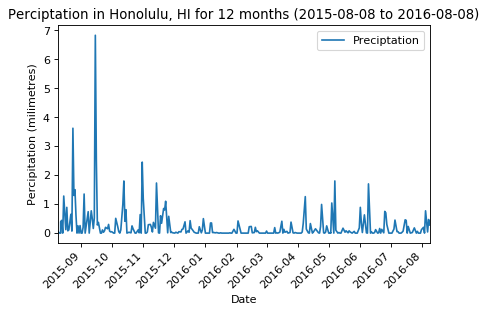

In [23]:
# Load Matplotlib to plot data
import matplotlib.pyplot as plt
import numpy as np

year_data_prcp_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Percipitation (milimetres)")
plt.title("Perciptation in Honolulu, HI for 12 months (2015-08-08 to 2016-08-08)")
plt.legend(["Preciptation"])
plt.xticks(rotation = 45)
gridlines = True
plt.figure(figsize=(10,12))
plt.show()

In [25]:
#Use Pandas to print the summary statistics for the precipitation data.
prcp_stat_df = year_data_prcp_df.describe()
prcp_stat_df

,prcp
count,281.000000
mean,0.241922
std,0.590654
min,0.000000
25%,0.000000
50%,0.030000
75%,0.230000
max,6.830000


# Temperature Analysis

Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

Plot the min, avg, and max temperature from your previous query as a bar chart.

Use the average temperature as the bar height.

Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [60]:
# Write a function called calc_temps that will accept a start date 
# and end date in the format %Y-%m-%d and return the minimum, average, 
# and maximum temperatures for that range of dates.

#function:
def calc_temps(start_date, end_date):
    min_temp = session.query(func.min(Measurement.tobs))\
    .filter(Measurement.date >= start_date)\
    .filter(Measurement.date <= end_date).all()

    max_temp = session.query(func.max(Measurement.tobs))\
    .filter(Measurement.date >= start_date)\
    .filter(Measurement.date <= end_date).all()

    avg_temp = session.query(func.avg(Measurement.tobs))\
    .filter(Measurement.date >= start_date)\
    .filter(Measurement.date <= end_date).all()
    
    print("Climate in Honolulu, Hawaii from " +start_date+ " to " +end_date+ 
          " saw a low of " + str(min_temp)+ "degrees F and a high of " +str(max_temp)+
          " degrees F. The average temperature was " +str(avg_temp)+ " degrees F.")
    
    return min_temp, max_temp, avg_temp

In [61]:
# Use the calc_temps function to calculate the min, avg, and 
# max temperatures for your trip using the matching dates from
# the previous year (i.e. use "2017-01-01" if your trip start date
# was "2018-01-01")

# dates for the trip: 2016-08-08 to 2016-08-12
# matching dates from the previous year: 2015-08-08 to 2015-08-12

start_date = "2015-08-08"
end_date = "2015-08-12"
calc_temps(start_date, end_date)



Climate in Honolulu, Hawaii from 2015-08-08 to 2015-08-12 saw a low of [(73,)]degrees F and a high of [(83,)] degrees F. The average temperature was [(78.60714285714286,)] degrees F.


([(73)], [(83)], [(78.60714285714286)])